In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
import datetime

%matplotlib inline
pd.set_option('display.max_columns', 100)

### EDA

In [2]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
df.sample(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
6082,posted,NaN,NaN,ACC-819621312,AUD,145.04 -37.85,PAYMENT,NaN,NaN,Michele,5672.55,2018-09-17,F,30,NaN,NaN,2018-09-17T04:00:00.000+0000,66.00,80082983295a45138fbe821320a8a414,Australia,CUS-1271030853,NaN,debit
9831,authorized,1.0,NaN,ACC-90814749,AUD,151.68 -32.98,POS,eb93860b-42d6-4afd-8c0b-74fb08a1336f,NaN,Christopher,11418.21,2018-10-14,M,35,Hamilton,NSW,2018-10-14T23:40:44.000+0000,65.69,2ff219ba2f884f75b002168c870e3c33,Australia,CUS-1896554896,151.75 -32.92,debit
871,authorized,1.0,NaN,ACC-37709441,AUD,153.41 -28.01,POS,62a327c6-f9ec-41c7-bbdd-06c756f1c8b9,NaN,Charles,4135.85,2018-08-07,M,18,Main Beach,QLD,2018-08-07T21:51:33.000+0000,2.87,24c07eaba29e41f793203a7c51358126,Australia,CUS-3336454548,153.43 -27.98,debit
9038,authorized,1.0,NaN,ACC-1334819143,AUD,145.13 -37.70,POS,1a642b2b-4105-4b4f-8d30-3ec8171706a5,NaN,Christopher,63210.95,2018-10-09,M,33,West Footscray,VIC,2018-10-09T11:04:04.000+0000,32.56,fed6b21b4fda40a8a855d1ce28e3a282,Australia,CUS-3117610635,144.88 -37.8,debit
8333,authorized,1.0,NaN,ACC-559365433,AUD,147.31 -42.88,SALES-POS,27f93a60-ed2e-4b56-826d-8b1c9f1c1b8a,NaN,Mary,3434.67,2018-10-03,F,64,Regents Park,NSW,2018-10-03T21:47:29.000+0000,39.24,bfd1ef3e604e42f5b543560e2149bd3a,Australia,CUS-1654129794,151.02 -33.88,debit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [5]:
df.describe(include='all').T

C:\Users\WINDOWS\AppData\Local\Temp/ipykernel_6660/377021028.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
status,12043,2,authorized,7717,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_present_flag,7717.0,NaN,NaN,NaN,NaT,NaT,0.802644,0.398029,0.0,1.0,1.0,1.0,1.0
bpay_biller_code,885.0,3.0,0.0,883.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account,12043,100,ACC-1598451071,578,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,12043,1,AUD,12043,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
long_lat,12043,100,153.41 -27.95,578,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
txn_description,12043,6,SALES-POS,3934,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchant_id,7717,5725,106e1272-44ab-4dcb-a438-dd98e0071e51,14,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchant_code,883.0,NaN,NaN,NaN,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0
first_name,12043,80,Michael,746,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

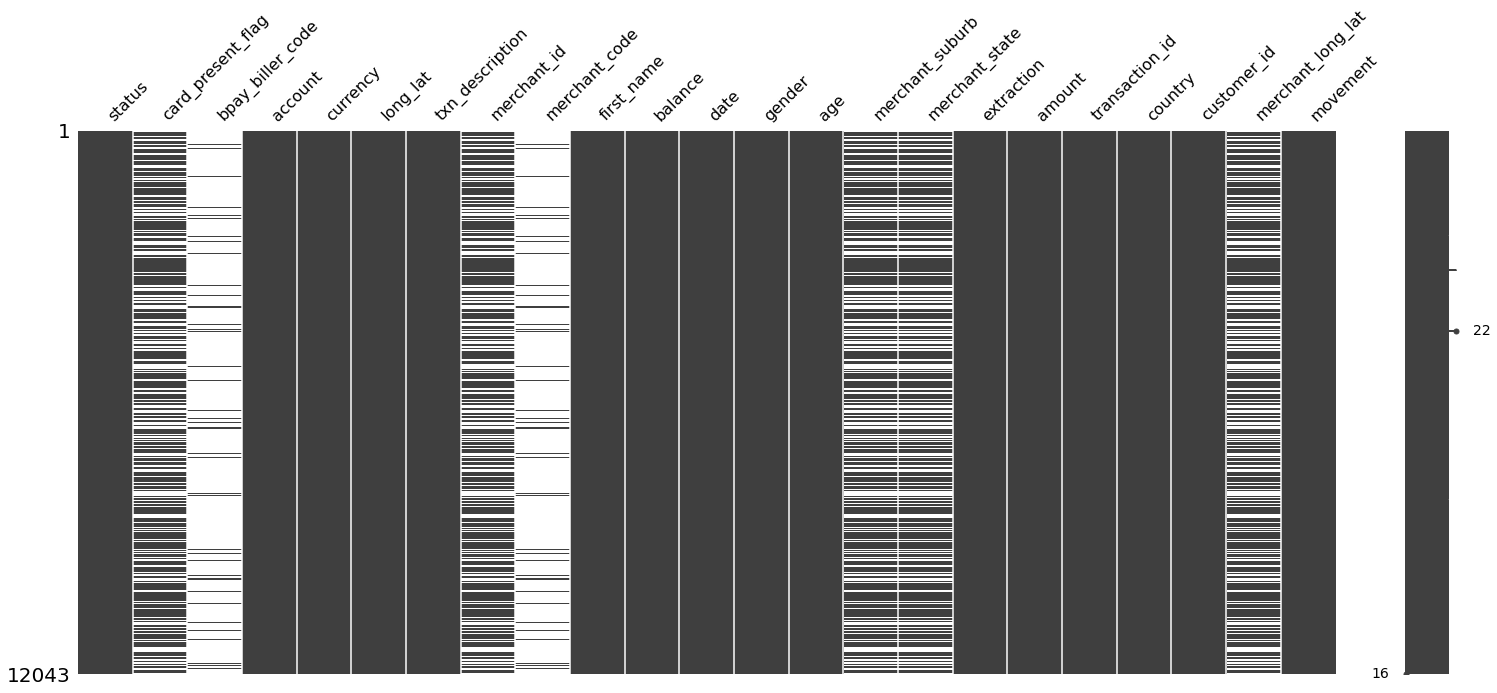

In [6]:
msno.matrix(df.sort_values('date'))

### Descriptive Analytic

In [7]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [8]:
df["date"] = pd.to_datetime(df["date"])

In [9]:
df["year_month"] = df.date.dt.to_period('M')

#### number of transactions by time

In [10]:
print(f"Average {df.date.value_counts().mean()} transactions per day")

Average 132.34065934065933 transactions per day


Text(0, 0.5, 'Number of transactions')

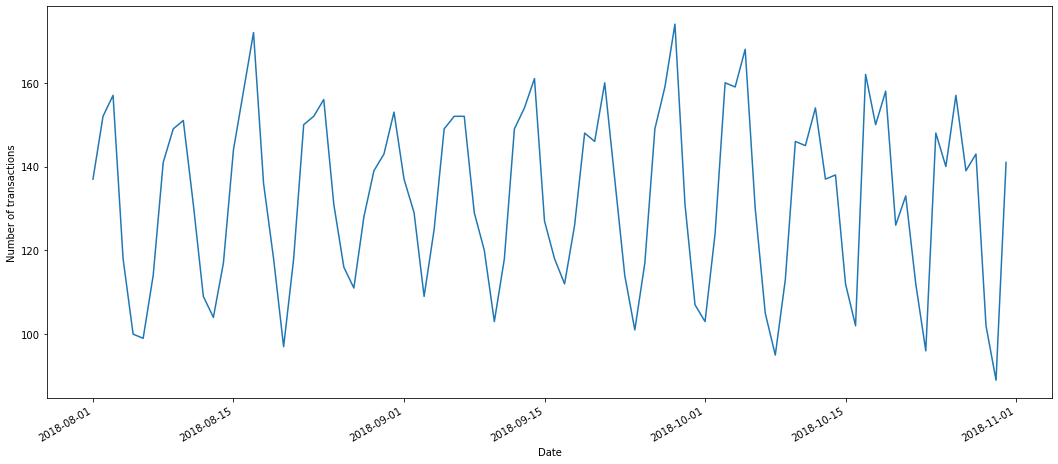

In [11]:
plt.figure(figsize=(18,8))
df.groupby('date')['date'].count().plot()
plt.xlabel("Date")
plt.ylabel("Number of transactions")

In [12]:
from pandas.api.types import CategoricalDtype

In [13]:
df['day_week'] = df.date.dt.day_name()

In [14]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cat_type = CategoricalDtype(categories=cats, ordered=True)
df['day_week'] = df['day_week'].astype(cat_type)

#### transact  by day week 

In [15]:
transactionbydate = df.groupby('date')[['transaction_id']].agg('count').reset_index()

In [16]:
transactionbydate['dayweek'] = transactionbydate.date.dt.day_name()

In [17]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cat_type = CategoricalDtype(categories=cats, ordered=True)
transactionbydate['dayweek'] = transactionbydate['dayweek'].astype(cat_type)

<AxesSubplot:xlabel='dayweek'>

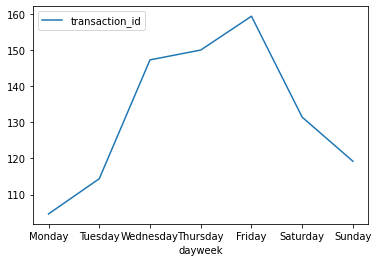

In [18]:
transactionbydate.groupby('dayweek').mean().plot()

### number of transactions by customer (Top 10)

<AxesSubplot:>

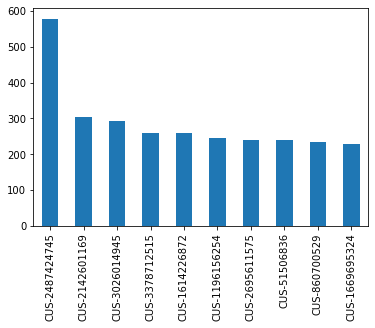

In [19]:
df.customer_id.value_counts().head(10).plot(kind = 'bar')

In [20]:
print(f"Average {df.customer_id.value_counts().mean()} transactions per customer")

Average 120.43 transactions per customer


In [21]:
print(f"We have {df.customer_id.nunique()} customers")

We have 100 customers


In [22]:
df.age.describe()

count    12043.000000
mean        30.582330
std         10.046343
min         18.000000
25%         22.000000
50%         28.000000
75%         38.000000
max         78.000000
Name: age, dtype: float64

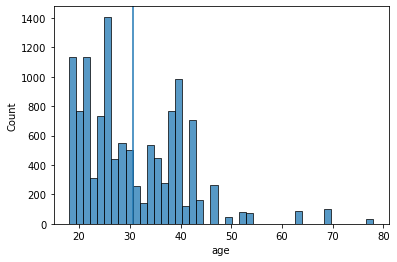

In [23]:
sns.histplot(data = df, x= 'age')
plt.axvline(df.age.mean())

In [24]:
df.groupby('gender')[['balance','amount']].mean()

,balance,amount
gender,,
F,12061.260431,168.517303
M,17125.519410,205.721809


<AxesSubplot:xlabel='age', ylabel='amount'>

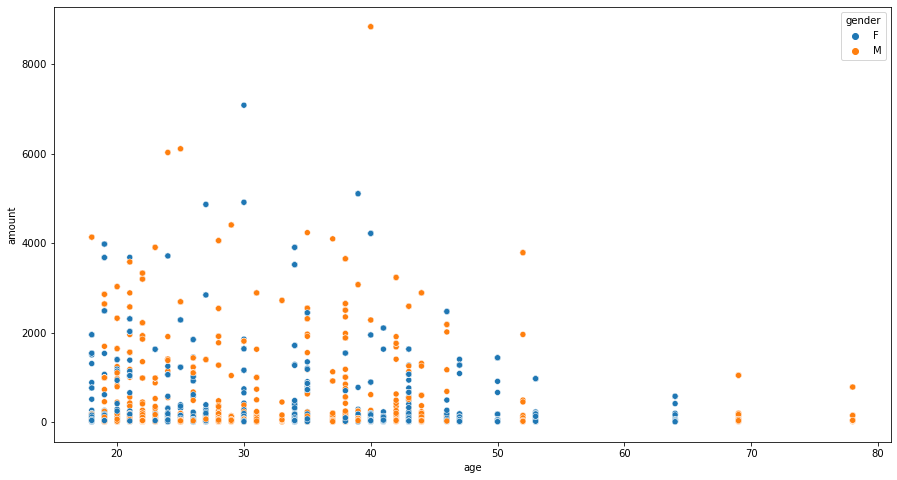

In [25]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = df, x='age', y='amount', hue='gender')

Text(0, 0.5, 'Amount ($)')

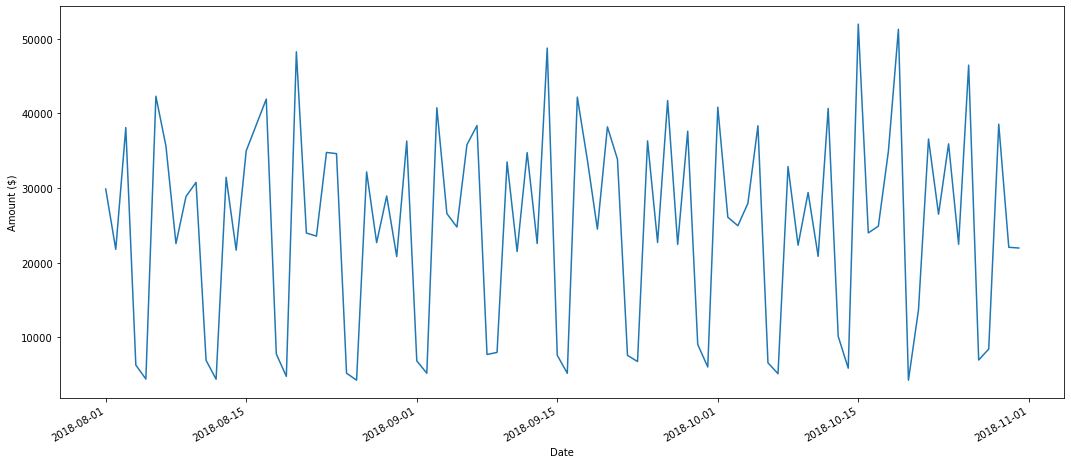

In [26]:
plt.figure(figsize=(18,8))
df.groupby('date')['amount'].sum().plot()
plt.xlabel("Date")
plt.ylabel("Amount ($)")

In [27]:
damount =df.groupby('date')[['amount']].sum().reset_index()

In [28]:
damount['dayname'] =damount.date.dt.day_name()

In [29]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cat_type = CategoricalDtype(categories=cats, ordered=True)
damount['dayname'] = damount['dayname'].astype(cat_type)

<AxesSubplot:xlabel='dayname'>

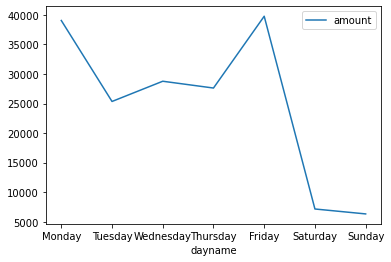

In [30]:
damount.groupby('dayname').mean().plot()

<AxesSubplot:xlabel='age', ylabel='amount'>

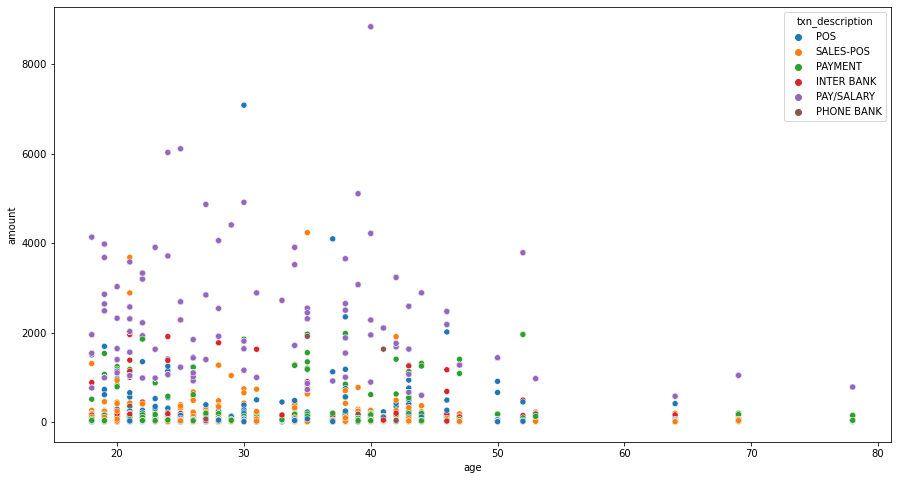

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = df, x='age', y='amount', hue='txn_description')

In [32]:
df.groupby('merchant_state')[['amount']].sum().sort_values(by=['amount'],ascending = False)

,amount
merchant_state,
NSW,102021.77
VIC,87584.00
QLD,53483.45
WA,33992.06
SA,16776.57
NT,9168.89
ACT,4876.68
TAS,1962.93


In [33]:
df[['long_lat','merchant_long_lat','merchant_state']].head()

,long_lat,merchant_long_lat,merchant_state
0,153.41 -27.95,153.38 -27.99,QLD
1,153.41 -27.95,151.21 -33.87,NSW
2,151.23 -33.94,151.21 -33.87,NSW
3,153.10 -27.66,153.05 -26.68,QLD
4,153.41 -27.95,153.44 -28.06,QLD


In [34]:
long_lat = df.long_lat.str.split(' ',expand=True)
long_lat.columns = ['long','lat']

In [35]:
merchant_long_lat = df.merchant_long_lat.str.split(' ',expand=True)
merchant_long_lat.columns = ['merchant_long','merchant_lat']

In [36]:
long_lat_df = pd.concat([long_lat,merchant_long_lat],axis=1)
long_lat_df = long_lat_df.astype('float')
long_lat_df.head()

,long,lat,merchant_long,merchant_lat
0,153.41,-27.95,153.38,-27.99
1,153.41,-27.95,151.21,-33.87
2,151.23,-33.94,151.21,-33.87
3,153.10,-27.66,153.05,-26.68
4,153.41,-27.95,153.44,-28.06


In [37]:
df = pd.concat([df,long_lat_df],axis=1)

In [38]:
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [39]:
df['distant'] = haversine_vectorize(df['long'],df['lat'],df['merchant_long'],df['merchant_lat'])

In [40]:
df['distant'].describe()

count     7717.000000
mean       561.941949
std       1365.945663
min          0.000000
25%         15.110447
50%         29.978086
75%        298.932674
max      10890.446460
Name: distant, dtype: float64

<AxesSubplot:xlabel='amount', ylabel='distant'>

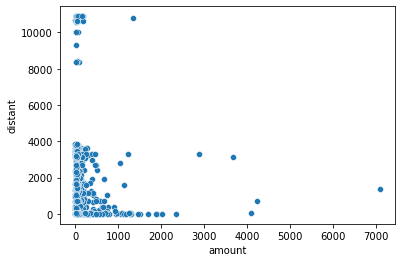

In [41]:
sns.scatterplot(x=df['amount'] ,y =df['distant'])

In [42]:
df.head(1)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,year_month,day_week,long,lat,merchant_long,merchant_lat,distant
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,2018-08,Wednesday,153.41,-27.95,153.38,-27.99,5.331721


In [43]:
dist = df.loc[(df['long'] >113) & (df['long']<154) & (df['lat'] >-44) & (df['lat']<-10)][['distant']]

In [44]:
dist[dist.distant < 100].describe().T

,count,mean,std,min,25%,50%,75%,max
distant,5237.0,24.409883,19.500042,0.0,11.285833,18.916955,30.940925,99.36566


most transaction distant between 11.3-31 km.

In [45]:
df.shape

(12043, 30)

In [46]:
dist[dist.distant < 100].shape

(5237, 1)

## Predictive Modelling


In [47]:
df_salaries = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_salaries.head()

,card_present_flag,merchant_code,balance,age,amount,long,lat,merchant_long,merchant_lat,distant
customer_id,,,,,,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53.0,970.47,153.03,-27.51,NaN,NaN,NaN
CUS-1117979751,NaN,0.0,11957.202857,21.0,3578.65,115.81,-31.82,NaN,NaN,NaN
CUS-1140341822,NaN,0.0,5841.720000,28.0,1916.51,144.97,-37.42,NaN,NaN,NaN
CUS-1147642491,NaN,0.0,8813.467692,34.0,1711.39,151.04,-33.77,NaN,NaN,NaN
CUS-1196156254,NaN,0.0,23845.717143,34.0,3903.73,138.52,-35.01,NaN,NaN,NaN


<AxesSubplot:xlabel='age', ylabel='balance'>

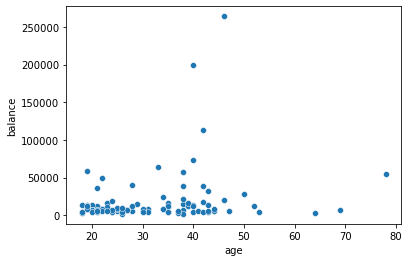

In [49]:
sns.scatterplot(x= df_salaries.age, y=df_salaries.balance)

#### Feature Selection

In [50]:
salaries = []

for customer_id in df["customer_id"]:
    salaries.append(int(df_salaries.loc[customer_id]["amount"]))
    
df["annual_salary"] = salaries

In [65]:
df_cus = df.groupby("customer_id").mean().reset_index()
df_cus.head()

,customer_id,card_present_flag,merchant_code,balance,age,amount,long,lat,merchant_long,merchant_lat,distant,annual_salary
0,CUS-1005756958,0.812500,0.0,2275.852055,53.0,222.862603,153.03,-27.51,152.860000,-28.211875,111.020522,970.0
1,CUS-1117979751,0.826923,0.0,9829.929000,21.0,339.843700,115.81,-31.82,123.255962,-32.413846,717.189885,3578.0
2,CUS-1140341822,0.815385,0.0,5699.212250,28.0,212.632500,144.97,-37.42,145.388000,-36.929692,203.913954,1916.0
3,CUS-1147642491,0.750000,0.0,9032.841186,34.0,245.600169,151.04,-33.77,146.674342,-33.809737,441.387523,1711.0
4,CUS-1196156254,0.785276,0.0,22272.433755,34.0,147.145796,138.52,-35.01,139.481166,-34.909448,793.775645,3903.0


In [80]:
temp1 = df_cus[['customer_id','card_present_flag','balance','age','amount','distant','annual_salary']]

In [108]:
temp1.head()

,customer_id,card_present_flag,balance,age,amount,distant,annual_salary
0,CUS-1005756958,0.812500,2275.852055,53.0,222.862603,111.020522,970.0
1,CUS-1117979751,0.826923,9829.929000,21.0,339.843700,717.189885,3578.0
2,CUS-1140341822,0.815385,5699.212250,28.0,212.632500,203.913954,1916.0
3,CUS-1147642491,0.750000,9032.841186,34.0,245.600169,441.387523,1711.0
4,CUS-1196156254,0.785276,22272.433755,34.0,147.145796,793.775645,3903.0


In [110]:
temp2 = df[['customer_id','gender']].drop_duplicates()

In [112]:
temp2.head()

,customer_id,gender
0,CUS-2487424745,F
2,CUS-2142601169,M
3,CUS-1614226872,F
5,CUS-2688605418,M
6,CUS-4123612273,F


In [116]:
df_cus = temp1.merge(right= temp2, how = 'inner', on = 'customer_id')

In [124]:
df_cus.gender = df_cus.gender.apply(lambda x: 0 if x == 'F' else 1)

In [125]:
df_cus.head()

,customer_id,card_present_flag,balance,age,amount,distant,annual_salary,gender
0,CUS-1005756958,0.812500,2275.852055,53.0,222.862603,111.020522,970.0,0
1,CUS-1117979751,0.826923,9829.929000,21.0,339.843700,717.189885,3578.0,1
2,CUS-1140341822,0.815385,5699.212250,28.0,212.632500,203.913954,1916.0,1
3,CUS-1147642491,0.750000,9032.841186,34.0,245.600169,441.387523,1711.0,0
4,CUS-1196156254,0.785276,22272.433755,34.0,147.145796,793.775645,3903.0,0


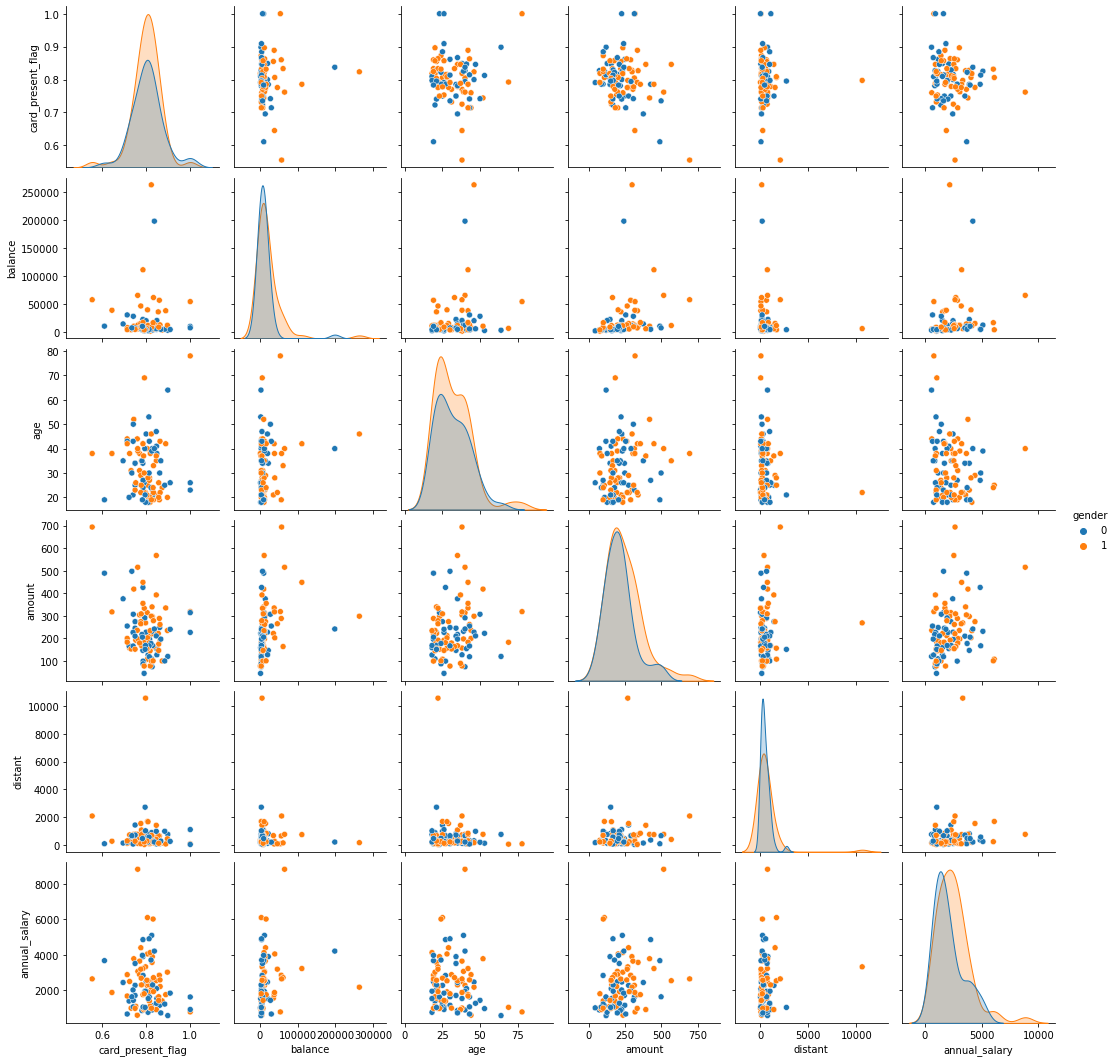

In [133]:
sns.pairplot(df_cus, hue='gender')

In [157]:
import sklearn
from sklearn.linear_model import LinearRegression

In [135]:
X = df_cus[['card_present_flag','balance','age','amount','distant','gender']]

In [154]:
y = df_cus[['annual_salary']]

In [137]:
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

In [159]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'R-Squared : {lr.score(X_valid, y_valid)}')

R-Squared : -0.0987632613883418


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


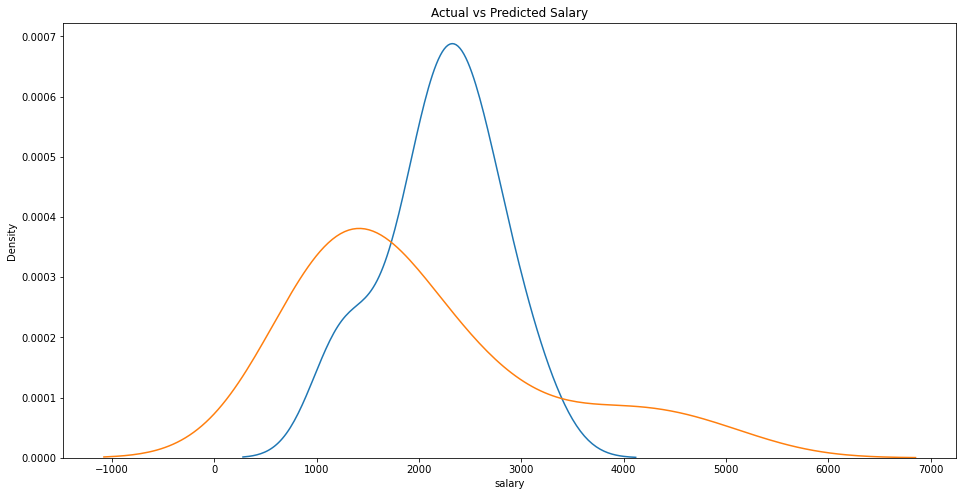

In [163]:
outcome = 'Salary'
y_hat = lr.predict(X_valid)
plt.figure(figsize=(16,8))
sns.distplot(y_hat, hist = False, label = f'Predicted {outcome}')
sns.distplot(y_valid, hist = False, label = f'Actual {outcome}')
plt.title(f'Actual vs Predicted {outcome}')
plt.xlabel('salary')
plt.ylabel('Density')
plt.show()

##### Conclusion
We built basic multiple linear regression model and get bad R-squared value

In [172]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [173]:
decision_tree_reg.predict(X_valid)

array([3676., 5103., 1059., 8835.,  970.,  664., 2500., 1158., 1138.,
       3712., 3578., 2485., 6107., 1099., 3712., 2485.,  983., 1225.,
       2572., 1808.])

In [174]:
decision_tree_reg.score(X_valid, y_valid)

-1.6970059870536436